In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import matplotlib
# matplotlib.rcParams['font.family'] = 'Malgun Gothic'  # windows
matplotlib.rcParams['font.family'] = 'AppleGothic'  # Mac
matplotlib.rcParams['font.size'] = 15  # 글자크기
matplotlib.rcParams['axes.unicode_minus'] = False # 한글 폰트 사용시 마이너스 꺠지지않게 해줌

In [5]:
df = pd.read_csv('./df_1.csv', index_col=0)
df

,자치구명,계약일_x,건물면적(㎡),층,건축년도,연도,물건금액(만원),Close,월,FEDFUNDS,국제유가(Dubai) (US$/배럴),부동산 거래량,국고채?3년(평균),국고채?5년(평균),국고채?10년(평균),회사채?3년(평균),CD?91물(평균),"콜금리(1일물,평균)",기준금리,GDP대비가계부채비율
0,동대문구,2022-12-31,84.97,11,2003.0,2022,76500,NaN,2022-12,4.10,77.2,"3,698",3.63,3.59,3.54,5.3,4.02,3.24,3.25,NaN
1,구로구,2022-12-31,59.88,4,2011.0,2022,85000,NaN,2022-12,4.10,77.2,"3,698",3.63,3.59,3.54,5.3,4.02,3.24,3.25,NaN
2,노원구,2022-12-31,41.30,12,1988.0,2022,39000,NaN,2022-12,4.10,77.2,"3,698",3.63,3.59,3.54,5.3,4.02,3.24,3.25,NaN
3,동대문구,2022-12-31,59.98,12,2011.0,2022,80000,NaN,2022-12,4.10,77.2,"3,698",3.63,3.59,3.54,5.3,4.02,3.24,3.25,NaN
4,송파구,2022-12-31,100.82,1,1988.0,2022,185000,NaN,2022-12,4.10,77.2,"3,698",3.63,3.59,3.54,5.3,4.02,3.24,3.25,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560753,구로구,2016-01-01,84.85,18,1998.0,2016,30500,NaN,2016-01,0.34,26.9,"9,894",1.63,1.77,2.03,2.1,1.67,1.49,1.50,83.3
560754,노원구,2016-01-01,59.82,7,2005.0,2016,30800,NaN,2016-01,0.34,26.9,"9,894",1.63,1.77,2.03,2.1,1.67,1.49,1.50,83.3
560755,서초구,2016-01-01,134.36,12,2005.0,2016,94000,NaN,2016-01,0.34,26.9,"9,894",1.63,1.77,2.03,2.1,1.67,1.49,1.50,83.3
560756,양천구,2016-01-01,49.99,2,2000.0,2016,21000,NaN,2016-01,0.34,26.9,"9,894",1.63,1.77,2.03,2.1,1.67,1.49,1.50,83.3


### 건물나이 컬럼 생성(연도 - 건축년도) 및 건물나이 결측치 6행 삭제

In [6]:
# 건물나이 컬럼생성
df['건물나이'] = df['연도'] - df['건축년도']

In [7]:
df['건물나이']

0         19.0
1         11.0
2         34.0
3         11.0
4         34.0
          ... 
560753    18.0
560754    11.0
560755    11.0
560756    16.0
560757    25.0
Name: 건물나이, Length: 560758, dtype: float64

In [8]:
# 결측치 확인
df['건물나이'].isnull().sum()

6

In [9]:
# 결측치를 포함하는 행 제거
df = df.dropna(subset=['건물나이'])

### Close 결측치 채우기

In [10]:
# 시계열로 변환
df['계약일_x'] = pd.to_datetime(df['계약일_x'])

In [11]:
df = df.sort_values(by='계약일_x')

In [12]:
df

,자치구명,계약일_x,건물면적(㎡),층,건축년도,연도,물건금액(만원),Close,월,FEDFUNDS,...,부동산 거래량,국고채?3년(평균),국고채?5년(평균),국고채?10년(평균),회사채?3년(평균),CD?91물(평균),"콜금리(1일물,평균)",기준금리,GDP대비가계부채비율,건물나이
560757,노원구,2016-01-01,39.96,10,1991.0,2016,18000,NaN,2016-01,0.34,...,"9,894",1.63,1.77,2.03,2.1,1.67,1.49,1.50,83.3,25.0
560738,성동구,2016-01-01,75.37,10,1990.0,2016,55200,NaN,2016-01,0.34,...,"9,894",1.63,1.77,2.03,2.1,1.67,1.49,1.50,83.3,26.0
560739,금천구,2016-01-01,84.83,3,2002.0,2016,36800,NaN,2016-01,0.34,...,"9,894",1.63,1.77,2.03,2.1,1.67,1.49,1.50,83.3,14.0
560740,은평구,2016-01-01,101.97,9,2010.0,2016,67600,NaN,2016-01,0.34,...,"9,894",1.63,1.77,2.03,2.1,1.67,1.49,1.50,83.3,6.0
560741,노원구,2016-01-01,84.59,10,1990.0,2016,30300,NaN,2016-01,0.34,...,"9,894",1.63,1.77,2.03,2.1,1.67,1.49,1.50,83.3,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19,송파구,2022-12-31,84.71,11,1988.0,2022,138000,NaN,2022-12,4.10,...,"3,698",3.63,3.59,3.54,5.3,4.02,3.24,3.25,NaN,34.0
20,송파구,2022-12-31,84.90,24,2008.0,2022,172000,NaN,2022-12,4.10,...,"3,698",3.63,3.59,3.54,5.3,4.02,3.24,3.25,NaN,14.0
21,동대문구,2022-12-31,84.87,33,0.0,2022,90452,NaN,2022-12,4.10,...,"3,698",3.63,3.59,3.54,5.3,4.02,3.24,3.25,NaN,2022.0
11,양천구,2022-12-31,64.02,5,1996.0,2022,37000,NaN,2022-12,4.10,...,"3,698",3.63,3.59,3.54,5.3,4.02,3.24,3.25,NaN,26.0


In [13]:
df['Close'].isnull().sum()

167736

In [14]:
df['Close'] = df['Close'].fillna(method='ffill')

In [15]:
# 2016년 이전에 있던 종가는 2015-12-30일의 종가인 1961로 채우기
df['Close'].isnull().sum()

116

In [16]:
# 채우기
df['Close'].fillna(1961.310059, inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 560752 entries, 560757 to 0
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   자치구명                  560752 non-null  object        
 1   계약일_x                 560752 non-null  datetime64[ns]
 2   건물면적(㎡)               560752 non-null  float64       
 3   층                     560752 non-null  int64         
 4   건축년도                  560752 non-null  float64       
 5   연도                    560752 non-null  int64         
 6   물건금액(만원)              560752 non-null  int64         
 7   Close                 560752 non-null  float64       
 8   월                     560752 non-null  object        
 9   FEDFUNDS              560752 non-null  float64       
 10  국제유가(Dubai) (US$/배럴)  560752 non-null  float64       
 11  부동산 거래량               560752 non-null  object        
 12  국고채?3년(평균)            560752 non-null  float64       
 13 

### 부동산 거래량 ,지우고 type int64로 바꾸기

In [18]:
df['부동산 거래량'].value_counts()

14,446    16443
19,187    15787
34,199    15780
14,388    15430
17,372    14712
          ...  
6,529      1532
7,852      1369
5,791      1331
3,698       852
3,933       734
Name: 부동산 거래량, Length: 84, dtype: int64

In [19]:
# ,지우기
df['부동산 거래량'] = df['부동산 거래량'].str.replace(',', '')

In [20]:
# int로 변환
df = df.astype({'부동산 거래량' : 'int'})

In [21]:
df

,자치구명,계약일_x,건물면적(㎡),층,건축년도,연도,물건금액(만원),Close,월,FEDFUNDS,...,부동산 거래량,국고채?3년(평균),국고채?5년(평균),국고채?10년(평균),회사채?3년(평균),CD?91물(평균),"콜금리(1일물,평균)",기준금리,GDP대비가계부채비율,건물나이
560757,노원구,2016-01-01,39.96,10,1991.0,2016,18000,1961.310059,2016-01,0.34,...,9894,1.63,1.77,2.03,2.1,1.67,1.49,1.50,83.3,25.0
560738,성동구,2016-01-01,75.37,10,1990.0,2016,55200,1961.310059,2016-01,0.34,...,9894,1.63,1.77,2.03,2.1,1.67,1.49,1.50,83.3,26.0
560739,금천구,2016-01-01,84.83,3,2002.0,2016,36800,1961.310059,2016-01,0.34,...,9894,1.63,1.77,2.03,2.1,1.67,1.49,1.50,83.3,14.0
560740,은평구,2016-01-01,101.97,9,2010.0,2016,67600,1961.310059,2016-01,0.34,...,9894,1.63,1.77,2.03,2.1,1.67,1.49,1.50,83.3,6.0
560741,노원구,2016-01-01,84.59,10,1990.0,2016,30300,1961.310059,2016-01,0.34,...,9894,1.63,1.77,2.03,2.1,1.67,1.49,1.50,83.3,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19,송파구,2022-12-31,84.71,11,1988.0,2022,138000,2236.399902,2022-12,4.10,...,3698,3.63,3.59,3.54,5.3,4.02,3.24,3.25,NaN,34.0
20,송파구,2022-12-31,84.90,24,2008.0,2022,172000,2236.399902,2022-12,4.10,...,3698,3.63,3.59,3.54,5.3,4.02,3.24,3.25,NaN,14.0
21,동대문구,2022-12-31,84.87,33,0.0,2022,90452,2236.399902,2022-12,4.10,...,3698,3.63,3.59,3.54,5.3,4.02,3.24,3.25,NaN,2022.0
11,양천구,2022-12-31,64.02,5,1996.0,2022,37000,2236.399902,2022-12,4.10,...,3698,3.63,3.59,3.54,5.3,4.02,3.24,3.25,NaN,26.0


In [22]:
df.reset_index(drop=True, inplace=True)

In [23]:
df.head(1)

,자치구명,계약일_x,건물면적(㎡),층,건축년도,연도,물건금액(만원),Close,월,FEDFUNDS,...,부동산 거래량,국고채?3년(평균),국고채?5년(평균),국고채?10년(평균),회사채?3년(평균),CD?91물(평균),"콜금리(1일물,평균)",기준금리,GDP대비가계부채비율,건물나이
0,노원구,2016-01-01,39.96,10,1991.0,2016,18000,1961.310059,2016-01,0.34,...,9894,1.63,1.77,2.03,2.1,1.67,1.49,1.5,83.3,25.0


### 이상치 제거 
- 건축년도 = 0 
- 20,000 Rows 제거 


In [25]:
df = df.loc[~(df['건축년도'] ==0)]

In [26]:
df

,자치구명,계약일_x,건물면적(㎡),층,건축년도,연도,물건금액(만원),Close,월,FEDFUNDS,...,부동산 거래량,국고채?3년(평균),국고채?5년(평균),국고채?10년(평균),회사채?3년(평균),CD?91물(평균),"콜금리(1일물,평균)",기준금리,GDP대비가계부채비율,건물나이
0,노원구,2016-01-01,39.96,10,1991.0,2016,18000,1961.310059,2016-01,0.34,...,9894,1.63,1.77,2.03,2.1,1.67,1.49,1.50,83.3,25.0
1,성동구,2016-01-01,75.37,10,1990.0,2016,55200,1961.310059,2016-01,0.34,...,9894,1.63,1.77,2.03,2.1,1.67,1.49,1.50,83.3,26.0
2,금천구,2016-01-01,84.83,3,2002.0,2016,36800,1961.310059,2016-01,0.34,...,9894,1.63,1.77,2.03,2.1,1.67,1.49,1.50,83.3,14.0
3,은평구,2016-01-01,101.97,9,2010.0,2016,67600,1961.310059,2016-01,0.34,...,9894,1.63,1.77,2.03,2.1,1.67,1.49,1.50,83.3,6.0
4,노원구,2016-01-01,84.59,10,1990.0,2016,30300,1961.310059,2016-01,0.34,...,9894,1.63,1.77,2.03,2.1,1.67,1.49,1.50,83.3,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560746,서초구,2022-12-31,152.33,9,2004.0,2022,250000,2236.399902,2022-12,4.10,...,3698,3.63,3.59,3.54,5.3,4.02,3.24,3.25,NaN,18.0
560747,송파구,2022-12-31,84.71,11,1988.0,2022,138000,2236.399902,2022-12,4.10,...,3698,3.63,3.59,3.54,5.3,4.02,3.24,3.25,NaN,34.0
560748,송파구,2022-12-31,84.90,24,2008.0,2022,172000,2236.399902,2022-12,4.10,...,3698,3.63,3.59,3.54,5.3,4.02,3.24,3.25,NaN,14.0
560750,양천구,2022-12-31,64.02,5,1996.0,2022,37000,2236.399902,2022-12,4.10,...,3698,3.63,3.59,3.54,5.3,4.02,3.24,3.25,NaN,26.0


### Train & Test Split
- Train : 2016 ~ 2020 
- Test : 2021, 2022

### 결측치 대체
- GDP대비가계부채비율 
- train : 선형보간법 
- test : 직전 분기 값 대체

In [29]:
# train split (선형보간법 적용 위해 2021년 포함했으나 나중에 삭제 예정)
train_df = df[df['연도'] < 2022]
train_df

,자치구명,계약일_x,건물면적(㎡),층,건축년도,연도,물건금액(만원),Close,월,FEDFUNDS,...,부동산 거래량,국고채?3년(평균),국고채?5년(평균),국고채?10년(평균),회사채?3년(평균),CD?91물(평균),"콜금리(1일물,평균)",기준금리,GDP대비가계부채비율,건물나이
0,노원구,2016-01-01,39.96,10,1991.0,2016,18000,1961.310059,2016-01,0.34,...,9894,1.63,1.77,2.03,2.10,1.67,1.49,1.5,83.3,25.0
1,성동구,2016-01-01,75.37,10,1990.0,2016,55200,1961.310059,2016-01,0.34,...,9894,1.63,1.77,2.03,2.10,1.67,1.49,1.5,83.3,26.0
2,금천구,2016-01-01,84.83,3,2002.0,2016,36800,1961.310059,2016-01,0.34,...,9894,1.63,1.77,2.03,2.10,1.67,1.49,1.5,83.3,14.0
3,은평구,2016-01-01,101.97,9,2010.0,2016,67600,1961.310059,2016-01,0.34,...,9894,1.63,1.77,2.03,2.10,1.67,1.49,1.5,83.3,6.0
4,노원구,2016-01-01,84.59,10,1990.0,2016,30300,1961.310059,2016-01,0.34,...,9894,1.63,1.77,2.03,2.10,1.67,1.49,1.5,83.3,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519715,중구,2021-12-31,40.65,6,2018.0,2021,45500,2977.649902,2021-12,0.08,...,5791,1.80,1.98,2.19,2.41,1.27,1.01,1.0,NaN,3.0
519716,송파구,2021-12-31,84.43,5,2016.0,2021,168000,2977.649902,2021-12,0.08,...,5791,1.80,1.98,2.19,2.41,1.27,1.01,1.0,NaN,5.0
519717,강동구,2021-12-31,94.74,6,1999.0,2021,119500,2977.649902,2021-12,0.08,...,5791,1.80,1.98,2.19,2.41,1.27,1.01,1.0,NaN,22.0
519718,강서구,2021-12-31,59.79,4,2016.0,2021,123000,2977.649902,2021-12,0.08,...,5791,1.80,1.98,2.19,2.41,1.27,1.01,1.0,NaN,5.0


In [30]:
# '월'컬럼 시계열로 변경
train_df['월'] = pd.to_datetime(train_df['월'])

In [31]:
# 같은 날짜에 대해 첫 번째 값들만 추출
first_values = train_df.groupby('월').first()

In [32]:
# 인덱스 조정
train_df_first = first_values.reset_index()

In [33]:
train_df_first

,월,자치구명,계약일_x,건물면적(㎡),층,건축년도,연도,물건금액(만원),Close,FEDFUNDS,...,부동산 거래량,국고채?3년(평균),국고채?5년(평균),국고채?10년(평균),회사채?3년(평균),CD?91물(평균),"콜금리(1일물,평균)",기준금리,GDP대비가계부채비율,건물나이
0,2016-01-01,노원구,2016-01-01,39.96,10,1991.0,2016,18000,1961.310059,0.34,...,9894,1.63,1.77,2.03,2.10,1.67,1.49,1.50,83.3,25.0
1,2016-02-01,성동구,2016-02-01,62.41,13,1989.0,2016,35000,1924.819946,0.38,...,9584,1.47,1.59,1.83,1.95,1.64,1.49,1.50,NaN,27.0
2,2016-03-01,동작구,2016-03-01,84.98,6,2012.0,2016,71900,1916.660034,0.36,...,12628,1.50,1.61,1.85,1.98,1.63,1.49,1.50,NaN,4.0
3,2016-04-01,구로구,2016-04-01,16.92,17,2012.0,2016,13000,1973.569946,0.37,...,13526,1.47,1.57,1.81,1.94,1.61,1.49,1.50,84.3,4.0
4,2016-05-01,동대문구,2016-05-01,59.40,14,2002.0,2016,32500,1994.150024,0.37,...,15668,1.46,1.55,1.79,1.91,1.58,1.49,1.50,NaN,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,2021-08-01,노원구,2021-08-01,53.66,6,2002.0,2021,48000,3202.320068,0.09,...,16249,1.41,1.65,1.91,1.84,0.77,0.56,0.75,NaN,19.0
68,2021-09-01,노원구,2021-09-01,59.90,3,1999.0,2021,64400,3207.020020,0.08,...,13997,1.52,1.79,2.06,1.95,0.98,0.77,0.75,NaN,22.0
69,2021-10-01,강동구,2021-10-01,59.99,11,2011.0,2021,129000,3019.179932,0.08,...,10513,1.84,2.15,2.40,2.30,1.08,0.74,0.75,105.8,10.0
70,2021-11-01,동작구,2021-11-01,59.89,5,1993.0,2021,100000,2978.939941,0.08,...,7852,1.95,2.17,2.36,2.49,1.17,0.80,1.00,NaN,28.0


In [34]:
# 월 기준으로 GDP대비가계부채비율 결측치 대체 위해 따로 추출
train_df_first = train_df_first[['월', 'GDP대비가계부채비율']]

In [35]:
# train df에 GDP대비가계부채비율 컬럼을 선형보간법으로 결측값 대체
train_df_first['GDP대비가계부채비율'] = train_df_first['GDP대비가계부채비율'].interpolate(method='linear')

In [36]:
# 원래의 train df와 선형보간법으로 대체한 df 합치기
merged_df = pd.merge(train_df, train_df_first, on='월', how='left')

In [37]:
# 선형보간법 잘 적용되었는지 확인
merged_df.loc[merged_df['계약일_x']=='2020-11-01']

,자치구명,계약일_x,건물면적(㎡),층,건축년도,연도,물건금액(만원),Close,월,FEDFUNDS,...,국고채?3년(평균),국고채?5년(평균),국고채?10년(평균),회사채?3년(평균),CD?91물(평균),"콜금리(1일물,평균)",기준금리,GDP대비가계부채비율_x,건물나이,GDP대비가계부채비율_y
439376,구로구,2020-11-01,83.97,2,2006.0,2020,38000,2267.149902,2020-11-01,0.09,...,0.97,1.3,1.61,2.25,0.66,0.49,0.5,NaN,14.0,103.466667
439377,은평구,2020-11-01,114.98,3,2015.0,2020,117500,2267.149902,2020-11-01,0.09,...,0.97,1.3,1.61,2.25,0.66,0.49,0.5,NaN,5.0,103.466667
439378,구로구,2020-11-01,47.10,1,1996.0,2020,14000,2267.149902,2020-11-01,0.09,...,0.97,1.3,1.61,2.25,0.66,0.49,0.5,NaN,24.0,103.466667
439379,송파구,2020-11-01,136.24,7,2006.0,2020,125000,2267.149902,2020-11-01,0.09,...,0.97,1.3,1.61,2.25,0.66,0.49,0.5,NaN,14.0,103.466667
439380,송파구,2020-11-01,84.82,16,2017.0,2020,122000,2267.149902,2020-11-01,0.09,...,0.97,1.3,1.61,2.25,0.66,0.49,0.5,NaN,3.0,103.466667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439435,서초구,2020-11-01,136.87,2,2004.0,2020,150000,2267.149902,2020-11-01,0.09,...,0.97,1.3,1.61,2.25,0.66,0.49,0.5,NaN,16.0,103.466667
439436,강남구,2020-11-01,123.28,12,1984.0,2020,260000,2267.149902,2020-11-01,0.09,...,0.97,1.3,1.61,2.25,0.66,0.49,0.5,NaN,36.0,103.466667
439437,구로구,2020-11-01,38.92,3,1996.0,2020,15500,2267.149902,2020-11-01,0.09,...,0.97,1.3,1.61,2.25,0.66,0.49,0.5,NaN,24.0,103.466667
439438,송파구,2020-11-01,125.79,12,1988.0,2020,158000,2267.149902,2020-11-01,0.09,...,0.97,1.3,1.61,2.25,0.66,0.49,0.5,NaN,32.0,103.466667


In [38]:
# train df에 해당되지 않는 2021년 항목 제거
merged_df = merged_df.loc[merged_df['연도']!=2021]

In [39]:
# 필요없는 컬럼 삭제
merged_df.drop('GDP대비가계부채비율_x', axis = 1, inplace=True)

In [40]:
merged_df

,자치구명,계약일_x,건물면적(㎡),층,건축년도,연도,물건금액(만원),Close,월,FEDFUNDS,...,부동산 거래량,국고채?3년(평균),국고채?5년(평균),국고채?10년(평균),회사채?3년(평균),CD?91물(평균),"콜금리(1일물,평균)",기준금리,건물나이,GDP대비가계부채비율_y
0,노원구,2016-01-01,39.96,10,1991.0,2016,18000,1961.310059,2016-01-01,0.34,...,9894,1.63,1.77,2.03,2.10,1.67,1.49,1.5,25.0,83.300000
1,성동구,2016-01-01,75.37,10,1990.0,2016,55200,1961.310059,2016-01-01,0.34,...,9894,1.63,1.77,2.03,2.10,1.67,1.49,1.5,26.0,83.300000
2,금천구,2016-01-01,84.83,3,2002.0,2016,36800,1961.310059,2016-01-01,0.34,...,9894,1.63,1.77,2.03,2.10,1.67,1.49,1.5,14.0,83.300000
3,은평구,2016-01-01,101.97,9,2010.0,2016,67600,1961.310059,2016-01-01,0.34,...,9894,1.63,1.77,2.03,2.10,1.67,1.49,1.5,6.0,83.300000
4,노원구,2016-01-01,84.59,10,1990.0,2016,30300,1961.310059,2016-01-01,0.34,...,9894,1.63,1.77,2.03,2.10,1.67,1.49,1.5,26.0,83.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453165,성동구,2020-12-31,84.30,3,2016.0,2020,171000,2873.469971,2020-12-01,0.09,...,30495,0.97,1.32,1.68,2.21,0.66,0.51,0.5,4.0,103.933333
453166,성북구,2020-12-31,59.98,2,2001.0,2020,47000,2873.469971,2020-12-01,0.09,...,30495,0.97,1.32,1.68,2.21,0.66,0.51,0.5,19.0,103.933333
453167,용산구,2020-12-31,84.21,7,2011.0,2020,175000,2873.469971,2020-12-01,0.09,...,30495,0.97,1.32,1.68,2.21,0.66,0.51,0.5,9.0,103.933333
453168,은평구,2020-12-31,84.69,1,2004.0,2020,59700,2873.469971,2020-12-01,0.09,...,30495,0.97,1.32,1.68,2.21,0.66,0.51,0.5,16.0,103.933333


In [41]:
# 전체(강남 & 비강남 포함) train df
train_df_all = merged_df.copy()

In [42]:
train_df_all

,자치구명,계약일_x,건물면적(㎡),층,건축년도,연도,물건금액(만원),Close,월,FEDFUNDS,...,부동산 거래량,국고채?3년(평균),국고채?5년(평균),국고채?10년(평균),회사채?3년(평균),CD?91물(평균),"콜금리(1일물,평균)",기준금리,건물나이,GDP대비가계부채비율_y
0,노원구,2016-01-01,39.96,10,1991.0,2016,18000,1961.310059,2016-01-01,0.34,...,9894,1.63,1.77,2.03,2.10,1.67,1.49,1.5,25.0,83.300000
1,성동구,2016-01-01,75.37,10,1990.0,2016,55200,1961.310059,2016-01-01,0.34,...,9894,1.63,1.77,2.03,2.10,1.67,1.49,1.5,26.0,83.300000
2,금천구,2016-01-01,84.83,3,2002.0,2016,36800,1961.310059,2016-01-01,0.34,...,9894,1.63,1.77,2.03,2.10,1.67,1.49,1.5,14.0,83.300000
3,은평구,2016-01-01,101.97,9,2010.0,2016,67600,1961.310059,2016-01-01,0.34,...,9894,1.63,1.77,2.03,2.10,1.67,1.49,1.5,6.0,83.300000
4,노원구,2016-01-01,84.59,10,1990.0,2016,30300,1961.310059,2016-01-01,0.34,...,9894,1.63,1.77,2.03,2.10,1.67,1.49,1.5,26.0,83.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453165,성동구,2020-12-31,84.30,3,2016.0,2020,171000,2873.469971,2020-12-01,0.09,...,30495,0.97,1.32,1.68,2.21,0.66,0.51,0.5,4.0,103.933333
453166,성북구,2020-12-31,59.98,2,2001.0,2020,47000,2873.469971,2020-12-01,0.09,...,30495,0.97,1.32,1.68,2.21,0.66,0.51,0.5,19.0,103.933333
453167,용산구,2020-12-31,84.21,7,2011.0,2020,175000,2873.469971,2020-12-01,0.09,...,30495,0.97,1.32,1.68,2.21,0.66,0.51,0.5,9.0,103.933333
453168,은평구,2020-12-31,84.69,1,2004.0,2020,59700,2873.469971,2020-12-01,0.09,...,30495,0.97,1.32,1.68,2.21,0.66,0.51,0.5,16.0,103.933333


---

In [43]:
# '물건금액(만원)' 컬럼을 마지막으로 이동시키기
cols = train_df_all.columns.tolist()
cols.remove('물건금액(만원)')
cols.append('물건금액(만원)')
train_df_all = train_df_all[cols]

train_df_all

,자치구명,계약일_x,건물면적(㎡),층,건축년도,연도,Close,월,FEDFUNDS,국제유가(Dubai) (US$/배럴),...,국고채?3년(평균),국고채?5년(평균),국고채?10년(평균),회사채?3년(평균),CD?91물(평균),"콜금리(1일물,평균)",기준금리,건물나이,GDP대비가계부채비율_y,물건금액(만원)
0,노원구,2016-01-01,39.96,10,1991.0,2016,1961.310059,2016-01-01,0.34,26.9,...,1.63,1.77,2.03,2.10,1.67,1.49,1.5,25.0,83.300000,18000
1,성동구,2016-01-01,75.37,10,1990.0,2016,1961.310059,2016-01-01,0.34,26.9,...,1.63,1.77,2.03,2.10,1.67,1.49,1.5,26.0,83.300000,55200
2,금천구,2016-01-01,84.83,3,2002.0,2016,1961.310059,2016-01-01,0.34,26.9,...,1.63,1.77,2.03,2.10,1.67,1.49,1.5,14.0,83.300000,36800
3,은평구,2016-01-01,101.97,9,2010.0,2016,1961.310059,2016-01-01,0.34,26.9,...,1.63,1.77,2.03,2.10,1.67,1.49,1.5,6.0,83.300000,67600
4,노원구,2016-01-01,84.59,10,1990.0,2016,1961.310059,2016-01-01,0.34,26.9,...,1.63,1.77,2.03,2.10,1.67,1.49,1.5,26.0,83.300000,30300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453165,성동구,2020-12-31,84.30,3,2016.0,2020,2873.469971,2020-12-01,0.09,49.8,...,0.97,1.32,1.68,2.21,0.66,0.51,0.5,4.0,103.933333,171000
453166,성북구,2020-12-31,59.98,2,2001.0,2020,2873.469971,2020-12-01,0.09,49.8,...,0.97,1.32,1.68,2.21,0.66,0.51,0.5,19.0,103.933333,47000
453167,용산구,2020-12-31,84.21,7,2011.0,2020,2873.469971,2020-12-01,0.09,49.8,...,0.97,1.32,1.68,2.21,0.66,0.51,0.5,9.0,103.933333,175000
453168,은평구,2020-12-31,84.69,1,2004.0,2020,2873.469971,2020-12-01,0.09,49.8,...,0.97,1.32,1.68,2.21,0.66,0.51,0.5,16.0,103.933333,59700


---

- Test 결측치 대체 : 직전분기값 대체

In [44]:
# test split
test_df = df[df['연도'] >= 2021]
test_df

,자치구명,계약일_x,건물면적(㎡),층,건축년도,연도,물건금액(만원),Close,월,FEDFUNDS,...,부동산 거래량,국고채?3년(평균),국고채?5년(평균),국고채?10년(평균),회사채?3년(평균),CD?91물(평균),"콜금리(1일물,평균)",기준금리,GDP대비가계부채비율,건물나이
477321,양천구,2021-01-01,55.93,6,2002.0,2021,52000,2873.469971,2021-01,0.09,...,20938,0.98,1.32,1.73,2.14,0.68,0.49,0.50,104.4,19.0
477322,양천구,2021-01-01,49.99,7,2000.0,2021,52800,2873.469971,2021-01,0.09,...,20938,0.98,1.32,1.73,2.14,0.68,0.49,0.50,104.4,21.0
477323,강동구,2021-01-01,13.02,15,2020.0,2021,24000,2873.469971,2021-01,0.09,...,20938,0.98,1.32,1.73,2.14,0.68,0.49,0.50,104.4,1.0
477324,서초구,2021-01-01,59.93,25,2013.0,2021,120000,2873.469971,2021-01,0.09,...,20938,0.98,1.32,1.73,2.14,0.68,0.49,0.50,104.4,8.0
477325,강동구,2021-01-01,13.02,7,2020.0,2021,23000,2873.469971,2021-01,0.09,...,20938,0.98,1.32,1.73,2.14,0.68,0.49,0.50,104.4,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560746,서초구,2022-12-31,152.33,9,2004.0,2022,250000,2236.399902,2022-12,4.10,...,3698,3.63,3.59,3.54,5.30,4.02,3.24,3.25,NaN,18.0
560747,송파구,2022-12-31,84.71,11,1988.0,2022,138000,2236.399902,2022-12,4.10,...,3698,3.63,3.59,3.54,5.30,4.02,3.24,3.25,NaN,34.0
560748,송파구,2022-12-31,84.90,24,2008.0,2022,172000,2236.399902,2022-12,4.10,...,3698,3.63,3.59,3.54,5.30,4.02,3.24,3.25,NaN,14.0
560750,양천구,2022-12-31,64.02,5,1996.0,2022,37000,2236.399902,2022-12,4.10,...,3698,3.63,3.59,3.54,5.30,4.02,3.24,3.25,NaN,26.0


In [45]:
# test_df['GDP대비가계부채비율']직전 값으로 결측값 대체
test_df['GDP대비가계부채비율'] = test_df['GDP대비가계부채비율'].fillna(method='ffill')

# 결과 출력
print(test_df['GDP대비가계부채비율'])

477321    104.4
477322    104.4
477323    104.4
477324    104.4
477325    104.4
          ...  
560746    105.0
560747    105.0
560748    105.0
560750    105.0
560751    105.0
Name: GDP대비가계부채비율, Length: 82927, dtype: float64


In [46]:
# '물건금액(만원)' 컬럼을 마지막으로 이동시키기
cols = test_df.columns.tolist()
cols.remove('물건금액(만원)')
cols.append('물건금액(만원)')
test_df = test_df[cols]

test_df

,자치구명,계약일_x,건물면적(㎡),층,건축년도,연도,Close,월,FEDFUNDS,국제유가(Dubai) (US$/배럴),...,국고채?3년(평균),국고채?5년(평균),국고채?10년(평균),회사채?3년(평균),CD?91물(평균),"콜금리(1일물,평균)",기준금리,GDP대비가계부채비율,건물나이,물건금액(만원)
477321,양천구,2021-01-01,55.93,6,2002.0,2021,2873.469971,2021-01,0.09,54.8,...,0.98,1.32,1.73,2.14,0.68,0.49,0.50,104.4,19.0,52000
477322,양천구,2021-01-01,49.99,7,2000.0,2021,2873.469971,2021-01,0.09,54.8,...,0.98,1.32,1.73,2.14,0.68,0.49,0.50,104.4,21.0,52800
477323,강동구,2021-01-01,13.02,15,2020.0,2021,2873.469971,2021-01,0.09,54.8,...,0.98,1.32,1.73,2.14,0.68,0.49,0.50,104.4,1.0,24000
477324,서초구,2021-01-01,59.93,25,2013.0,2021,2873.469971,2021-01,0.09,54.8,...,0.98,1.32,1.73,2.14,0.68,0.49,0.50,104.4,8.0,120000
477325,강동구,2021-01-01,13.02,7,2020.0,2021,2873.469971,2021-01,0.09,54.8,...,0.98,1.32,1.73,2.14,0.68,0.49,0.50,104.4,1.0,23000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560746,서초구,2022-12-31,152.33,9,2004.0,2022,2236.399902,2022-12,4.10,77.2,...,3.63,3.59,3.54,5.30,4.02,3.24,3.25,105.0,18.0,250000
560747,송파구,2022-12-31,84.71,11,1988.0,2022,2236.399902,2022-12,4.10,77.2,...,3.63,3.59,3.54,5.30,4.02,3.24,3.25,105.0,34.0,138000
560748,송파구,2022-12-31,84.90,24,2008.0,2022,2236.399902,2022-12,4.10,77.2,...,3.63,3.59,3.54,5.30,4.02,3.24,3.25,105.0,14.0,172000
560750,양천구,2022-12-31,64.02,5,1996.0,2022,2236.399902,2022-12,4.10,77.2,...,3.63,3.59,3.54,5.30,4.02,3.24,3.25,105.0,26.0,37000


### 이상치 _ Train
1. 제거
2. 대체

In [51]:
# 이상치 분포를 그래프로 나타내는 함수
def plotoutliers(df):

    df_ = df.select_dtypes(include=[np.number])
    num_col = list(df_.columns)
    n = len(num_col)
    ncols = 4
    nrows = n // ncols + (n % ncols > 0)

    # 서브플롯 생성
    fig, axes = plt.subplots(nrows, ncols, figsize=(15, nrows*5))

    for i, var in enumerate(num_col):
        r, c = i // ncols, i % ncols
        ax = axes[r, c]
        df_.boxplot(column=var, ax=ax)
        ax.set_title(f'{var}')

    # 빈 서브플롯 제거
    if n % ncols > 0:
        for j in range(n % ncols, ncols):
            fig.delaxes(axes[nrows-1, j])

    plt.tight_layout()  #  plt.tight_layout() 함수는 서브플롯 간의 간격을 적절하게 조절합니다.
    matplotlib.rcParams['font.family'] = 'Malgun Gothic' 
    plt.show()

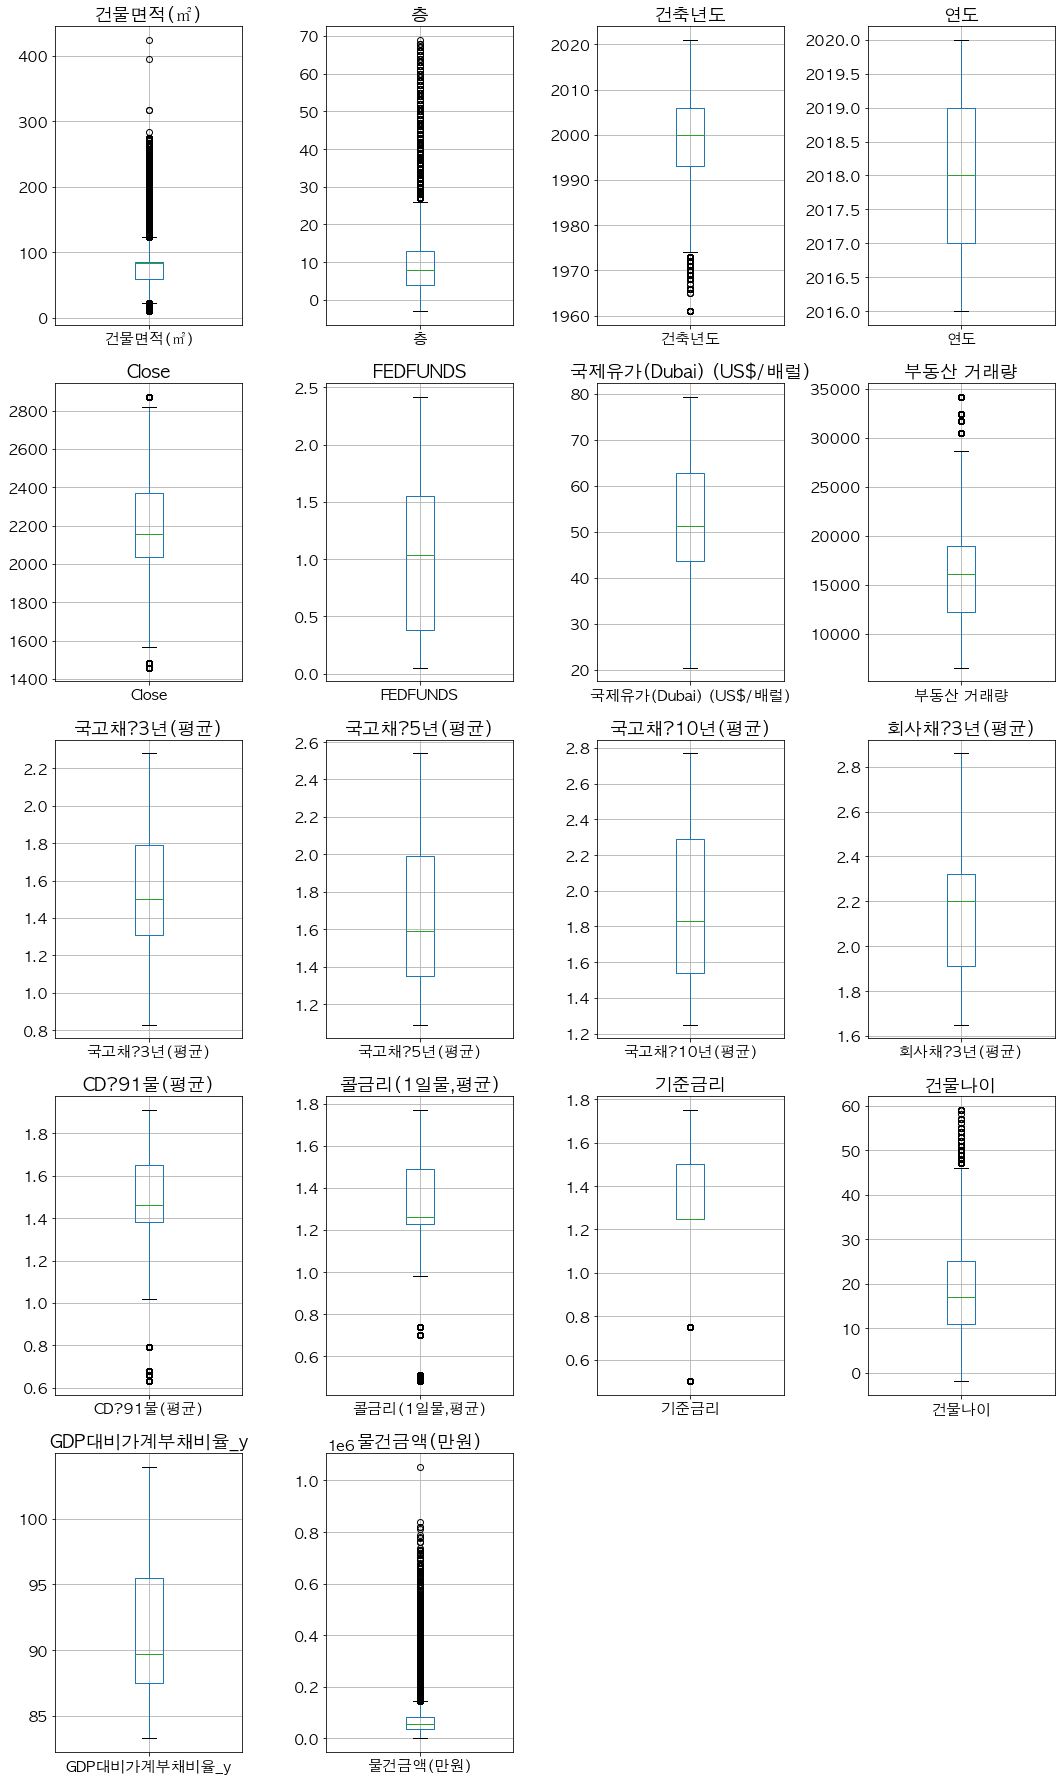

In [49]:
plotoutliers(train_df_all)

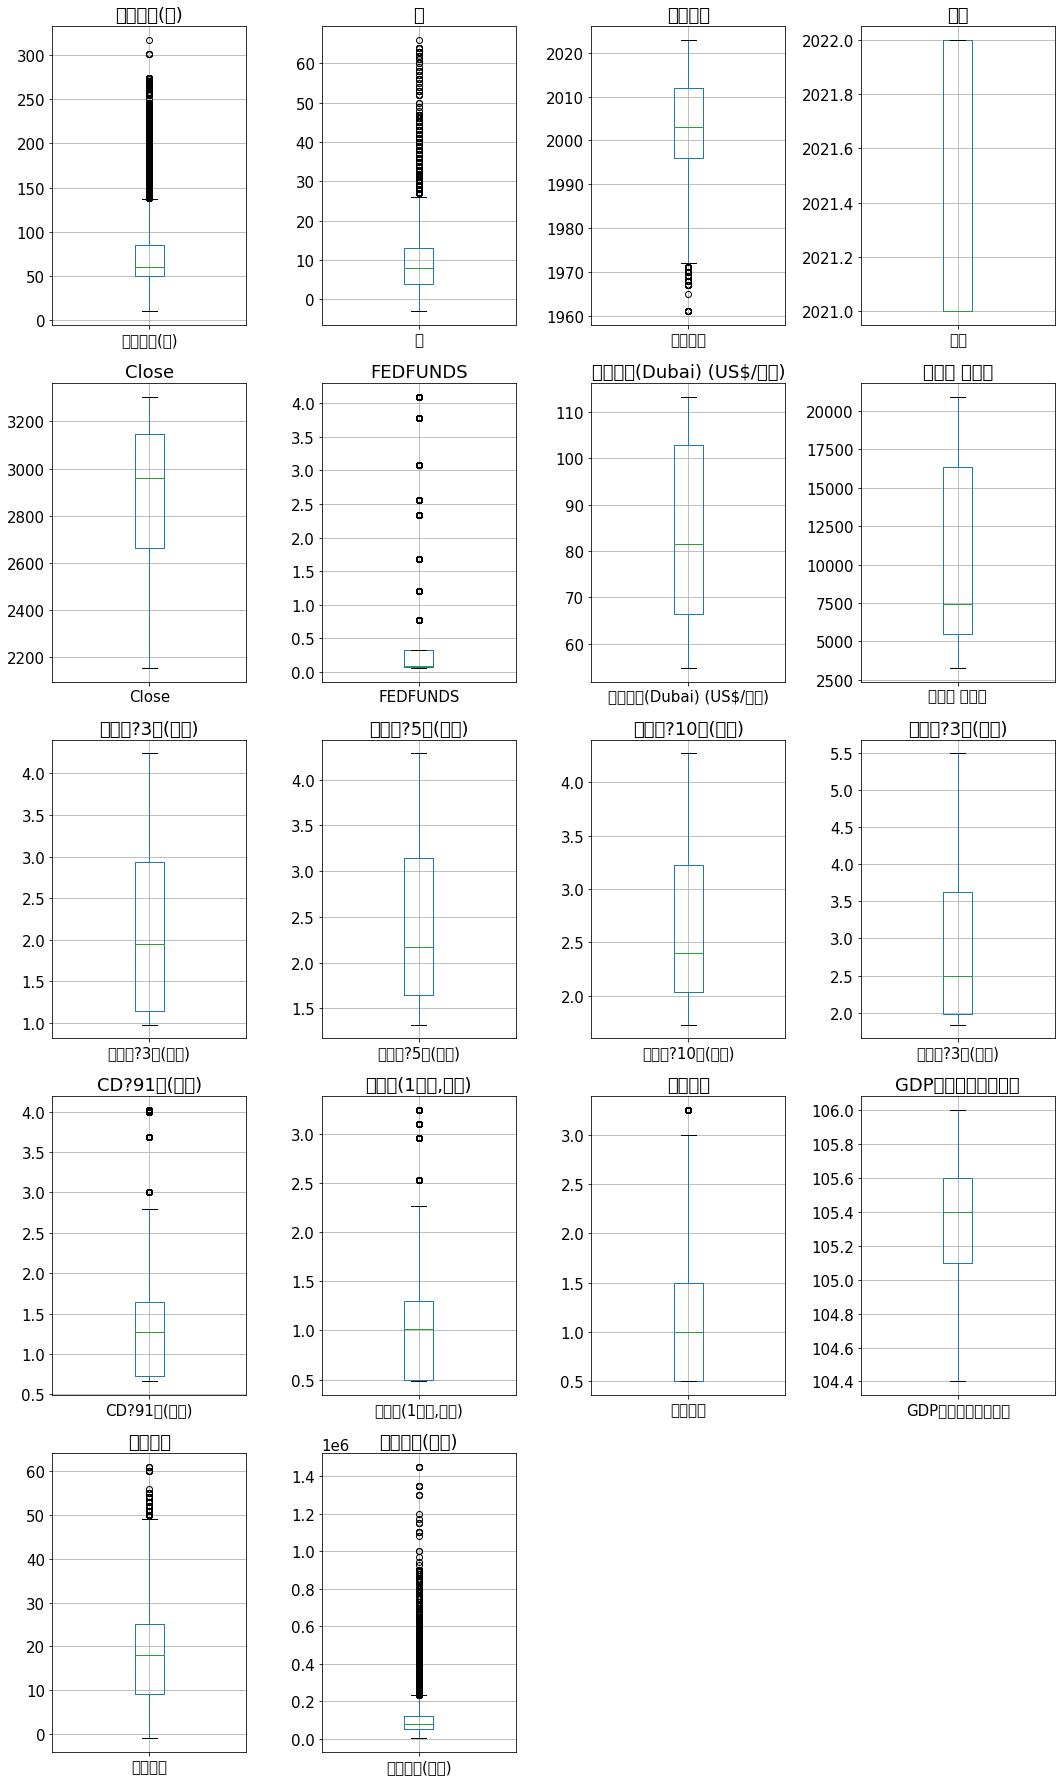

In [52]:
plotoutliers(test_df)

In [53]:
# 건물면적 - 이상치 모두 강남3구 
    # - 추후 비교 극대화 위해 그대로 진행 (제거 X)
train_df_all.loc[train_df_all['건물면적(㎡)'] <= 85]

,자치구명,계약일_x,건물면적(㎡),층,건축년도,연도,Close,월,FEDFUNDS,국제유가(Dubai) (US$/배럴),...,국고채?3년(평균),국고채?5년(평균),국고채?10년(평균),회사채?3년(평균),CD?91물(평균),"콜금리(1일물,평균)",기준금리,건물나이,GDP대비가계부채비율_y,물건금액(만원)
0,노원구,2016-01-01,39.96,10,1991.0,2016,1961.310059,2016-01-01,0.34,26.9,...,1.63,1.77,2.03,2.10,1.67,1.49,1.5,25.0,83.300000,18000
1,성동구,2016-01-01,75.37,10,1990.0,2016,1961.310059,2016-01-01,0.34,26.9,...,1.63,1.77,2.03,2.10,1.67,1.49,1.5,26.0,83.300000,55200
2,금천구,2016-01-01,84.83,3,2002.0,2016,1961.310059,2016-01-01,0.34,26.9,...,1.63,1.77,2.03,2.10,1.67,1.49,1.5,14.0,83.300000,36800
4,노원구,2016-01-01,84.59,10,1990.0,2016,1961.310059,2016-01-01,0.34,26.9,...,1.63,1.77,2.03,2.10,1.67,1.49,1.5,26.0,83.300000,30300
7,강남구,2016-01-01,50.67,4,1982.0,2016,1961.310059,2016-01-01,0.34,26.9,...,1.63,1.77,2.03,2.10,1.67,1.49,1.5,34.0,83.300000,87000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453165,성동구,2020-12-31,84.30,3,2016.0,2020,2873.469971,2020-12-01,0.09,49.8,...,0.97,1.32,1.68,2.21,0.66,0.51,0.5,4.0,103.933333,171000
453166,성북구,2020-12-31,59.98,2,2001.0,2020,2873.469971,2020-12-01,0.09,49.8,...,0.97,1.32,1.68,2.21,0.66,0.51,0.5,19.0,103.933333,47000
453167,용산구,2020-12-31,84.21,7,2011.0,2020,2873.469971,2020-12-01,0.09,49.8,...,0.97,1.32,1.68,2.21,0.66,0.51,0.5,9.0,103.933333,175000
453168,은평구,2020-12-31,84.69,1,2004.0,2020,2873.469971,2020-12-01,0.09,49.8,...,0.97,1.32,1.68,2.21,0.66,0.51,0.5,16.0,103.933333,59700


In [ ]:
## 건축년도 & 연도 -> 건물나이 만들고 날라갈 Column이기에 이상치 처리 단계  Skip

In [54]:
# Close -> 이상치 -> 그대로 진행

# train_df_all.loc[train_df_all['Close'] < 1500]
train_df_all.loc[train_df_all['Close'] > 2800]

,자치구명,계약일_x,건물면적(㎡),층,건축년도,연도,Close,월,FEDFUNDS,국제유가(Dubai) (US$/배럴),...,국고채?3년(평균),국고채?5년(평균),국고채?10년(평균),회사채?3년(평균),CD?91물(평균),"콜금리(1일물,평균)",기준금리,건물나이,GDP대비가계부채비율_y,물건금액(만원)
451548,양천구,2020-12-24,70.73,6,1987.0,2020,2806.860107,2020-12-01,0.09,49.8,...,0.97,1.32,1.68,2.21,0.66,0.51,0.5,33.0,103.933333,145000
451549,광진구,2020-12-24,51.39,13,1989.0,2020,2806.860107,2020-12-01,0.09,49.8,...,0.97,1.32,1.68,2.21,0.66,0.51,0.5,31.0,103.933333,94000
451550,송파구,2020-12-24,149.89,24,1999.0,2020,2806.860107,2020-12-01,0.09,49.8,...,0.97,1.32,1.68,2.21,0.66,0.51,0.5,21.0,103.933333,135000
451551,강동구,2020-12-24,59.79,10,1999.0,2020,2806.860107,2020-12-01,0.09,49.8,...,0.97,1.32,1.68,2.21,0.66,0.51,0.5,21.0,103.933333,80000
451552,금천구,2020-12-24,59.91,23,2002.0,2020,2806.860107,2020-12-01,0.09,49.8,...,0.97,1.32,1.68,2.21,0.66,0.51,0.5,18.0,103.933333,48700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453165,성동구,2020-12-31,84.30,3,2016.0,2020,2873.469971,2020-12-01,0.09,49.8,...,0.97,1.32,1.68,2.21,0.66,0.51,0.5,4.0,103.933333,171000
453166,성북구,2020-12-31,59.98,2,2001.0,2020,2873.469971,2020-12-01,0.09,49.8,...,0.97,1.32,1.68,2.21,0.66,0.51,0.5,19.0,103.933333,47000
453167,용산구,2020-12-31,84.21,7,2011.0,2020,2873.469971,2020-12-01,0.09,49.8,...,0.97,1.32,1.68,2.21,0.66,0.51,0.5,9.0,103.933333,175000
453168,은평구,2020-12-31,84.69,1,2004.0,2020,2873.469971,2020-12-01,0.09,49.8,...,0.97,1.32,1.68,2.21,0.66,0.51,0.5,16.0,103.933333,59700


In [55]:
# 부동산 거래량
train_df_all.loc[train_df_all['부동산 거래량'] > 34000]

,자치구명,계약일_x,건물면적(㎡),층,건축년도,연도,Close,월,FEDFUNDS,국제유가(Dubai) (US$/배럴),...,국고채?3년(평균),국고채?5년(평균),국고채?10년(평균),회사채?3년(평균),CD?91물(평균),"콜금리(1일물,평균)",기준금리,건물나이,GDP대비가계부채비율_y,물건금액(만원)
400040,강동구,2020-06-01,59.52,4,1998.0,2020,2065.080078,2020-06-01,0.08,40.8,...,0.85,1.13,1.39,2.22,0.79,0.48,0.5,22.0,99.633333,42800
400041,서대문구,2020-06-01,99.00,2,2004.0,2020,2065.080078,2020-06-01,0.08,40.8,...,0.85,1.13,1.39,2.22,0.79,0.48,0.5,16.0,99.633333,60000
400042,강남구,2020-06-01,100.50,7,1979.0,2020,2065.080078,2020-06-01,0.08,40.8,...,0.85,1.13,1.39,2.22,0.79,0.48,0.5,41.0,99.633333,218000
400043,양천구,2020-06-01,53.46,14,1988.0,2020,2065.080078,2020-06-01,0.08,40.8,...,0.85,1.13,1.39,2.22,0.79,0.48,0.5,32.0,99.633333,96000
400044,용산구,2020-06-01,59.88,12,1998.0,2020,2065.080078,2020-06-01,0.08,40.8,...,0.85,1.13,1.39,2.22,0.79,0.48,0.5,22.0,99.633333,130030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415658,구로구,2020-06-30,84.74,16,2002.0,2020,2108.330078,2020-06-01,0.08,40.8,...,0.85,1.13,1.39,2.22,0.79,0.48,0.5,18.0,99.633333,63000
415659,강동구,2020-06-30,84.97,17,2020.0,2020,2108.330078,2020-06-01,0.08,40.8,...,0.85,1.13,1.39,2.22,0.79,0.48,0.5,0.0,99.633333,146500
415660,노원구,2020-06-30,82.13,2,1984.0,2020,2108.330078,2020-06-01,0.08,40.8,...,0.85,1.13,1.39,2.22,0.79,0.48,0.5,36.0,99.633333,77000
415661,성동구,2020-06-30,59.78,16,2016.0,2020,2108.330078,2020-06-01,0.08,40.8,...,0.85,1.13,1.39,2.22,0.79,0.48,0.5,4.0,99.633333,132500


In [56]:
# 금리류 모두 이상치 처리 X 그대로 

### Columns 정리 
1. 계약일 제외 필요없는 col 제거
2. 컬럼이름 정리 
3. 컬럼 dtype 정리
4. Target col 끝으로 옮기기 

In [57]:
# 1. 계약일 제외 필요없는 col 제거 

# Train
train_df_all.drop(['건축년도', '연도', '월'], axis=1, inplace= True)

# Test
test_df.drop(['건축년도', '연도', '월'], axis=1, inplace=True)

In [59]:
train_df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 453170 entries, 0 to 453169
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   자치구명                  453170 non-null  object        
 1   계약일_x                 453170 non-null  datetime64[ns]
 2   건물면적(㎡)               453170 non-null  float64       
 3   층                     453170 non-null  int64         
 4   Close                 453170 non-null  float64       
 5   FEDFUNDS              453170 non-null  float64       
 6   국제유가(Dubai) (US$/배럴)  453170 non-null  float64       
 7   부동산 거래량               453170 non-null  int64         
 8   국고채?3년(평균)            453170 non-null  float64       
 9   국고채?5년(평균)            453170 non-null  float64       
 10  국고채?10년(평균)           453170 non-null  float64       
 11  회사채?3년(평균)            453170 non-null  float64       
 12  CD?91물(평균)            453170 non-null  float64       
 13 

In [60]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82927 entries, 477321 to 560751
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   자치구명                  82927 non-null  object        
 1   계약일_x                 82927 non-null  datetime64[ns]
 2   건물면적(㎡)               82927 non-null  float64       
 3   층                     82927 non-null  int64         
 4   Close                 82927 non-null  float64       
 5   FEDFUNDS              82927 non-null  float64       
 6   국제유가(Dubai) (US$/배럴)  82927 non-null  float64       
 7   부동산 거래량               82927 non-null  int64         
 8   국고채?3년(평균)            82927 non-null  float64       
 9   국고채?5년(평균)            82927 non-null  float64       
 10  국고채?10년(평균)           82927 non-null  float64       
 11  회사채?3년(평균)            82927 non-null  float64       
 12  CD?91물(평균)            82927 non-null  float64       
 13  콜금리(1일물,평균

In [67]:
# 2. 컬럼이름 정리

# Train
train_df_all.columns = ['자치구', '계약일', '건물면적(㎡)', '층', 'KOSPI종가', 'Fed기준금리', '국제유가(Dubai)($/배럴)',
       '부동산거래량', '국고채3년(평균)', '국고채5년(평균)', '국고채10년(평균)', '회사채3년(평균)',
       'CD91물(평균)', '콜금리(1일물,평균)', 'BOK기준금리', '건물연식', 'GDP대비가계부채비율',
       '물건금액(만원)']

# Test
test_df.columns = ['자치구', '계약일', '건물면적(㎡)', '층', 'KOSPI종가', 'Fed기준금리',
       '국제유가(Dubai)($/배럴)', '부동산거래량', '국고채3년(평균)', '국고채5년(평균)',
       '국고채10년(평균)', '회사채3년(평균)', 'CD91물(평균)', '콜금리(1일물,평균)', 'BOK기준금리',
        'GDP대비가계부채비율','건물연식', '물건금액(만원)']

In [128]:
# 3.컬럼 dtype 정리

# 건물연식 column : float -> int
    # Train
train_df_all['건물연식'] = train_df_all['건물연식'].astype(int)

    # Test
test_df['건물연식'] = test_df['건물연식'].astype(int)

In [76]:
# 인덱스 정리
test_df.reset_index(drop=True, inplace=True)

In [ ]:
# train, test 컬럼 위치 맞추기
new_order = ['자치구', '계약일', '건물면적(㎡)', '층', 'KOSPI종가', 'Fed기준금리', '국제유가(Dubai)($/배럴)',
       '부동산거래량', '국고채3년(평균)', '국고채5년(평균)', '국고채10년(평균)', '회사채3년(평균)',
       'CD91물(평균)', '콜금리(1일물,평균)', 'BOK기준금리', '건물연식','GDP대비가계부채비율',
       '물건금액(만원)']

In [81]:
columns = list(test_df.columns)
columns[-3], columns[-2] = columns[-2], columns[-3]
test_df = test_df[columns]

In [83]:
test_df.head(2)

,자치구,계약일,건물면적(㎡),층,KOSPI종가,Fed기준금리,국제유가(Dubai)($/배럴),부동산거래량,국고채3년(평균),국고채5년(평균),국고채10년(평균),회사채3년(평균),CD91물(평균),"콜금리(1일물,평균)",BOK기준금리,건물연식,GDP대비가계부채비율,물건금액(만원)
0,양천구,2021-01-01,55.93,6,2873.469971,0.09,54.8,20938,0.98,1.32,1.73,2.14,0.68,0.49,0.5,19.0,104.4,52000
1,양천구,2021-01-01,49.99,7,2873.469971,0.09,54.8,20938,0.98,1.32,1.73,2.14,0.68,0.49,0.5,21.0,104.4,52800


In [84]:
train_df_all.head(2)

,자치구,계약일,건물면적(㎡),층,KOSPI종가,Fed기준금리,국제유가(Dubai)($/배럴),부동산거래량,국고채3년(평균),국고채5년(평균),국고채10년(평균),회사채3년(평균),CD91물(평균),"콜금리(1일물,평균)",BOK기준금리,건물연식,GDP대비가계부채비율,물건금액(만원)
0,노원구,2016-01-01,39.96,10,1961.310059,0.34,26.9,9894,1.63,1.77,2.03,2.1,1.67,1.49,1.5,25.0,83.3,18000
1,성동구,2016-01-01,75.37,10,1961.310059,0.34,26.9,9894,1.63,1.77,2.03,2.1,1.67,1.49,1.5,26.0,83.3,55200


In [86]:
train_df_all.to_csv('train_df.csv', index = False, encoding = 'utf-8-sig')

In [87]:
test_df.to_csv('test.csv', index= False, encoding = 'utf-8-sig')

### Heatmap

In [150]:
# 각 숫자형 변수들의 피어슨 상관 분포를 히트맵으로 출력
def plot_cor(df):

    df_ = df.select_dtypes(include=[np.number])
    df_cor = df_.corr(method='pearson')
    plt.figure(figsize = (15, 15))
    plt.rc('font', family = 'Malgun Gothic')
    sns.heatmap(df_cor, 
                xticklabels = df_cor.columns, 
                yticklabels = df_cor.columns, 
                cmap = 'coolwarm', 
                annot = True,
                annot_kws = {'size':10}, 
                linewidth = 3,
                vmin=-1, vmax=1)

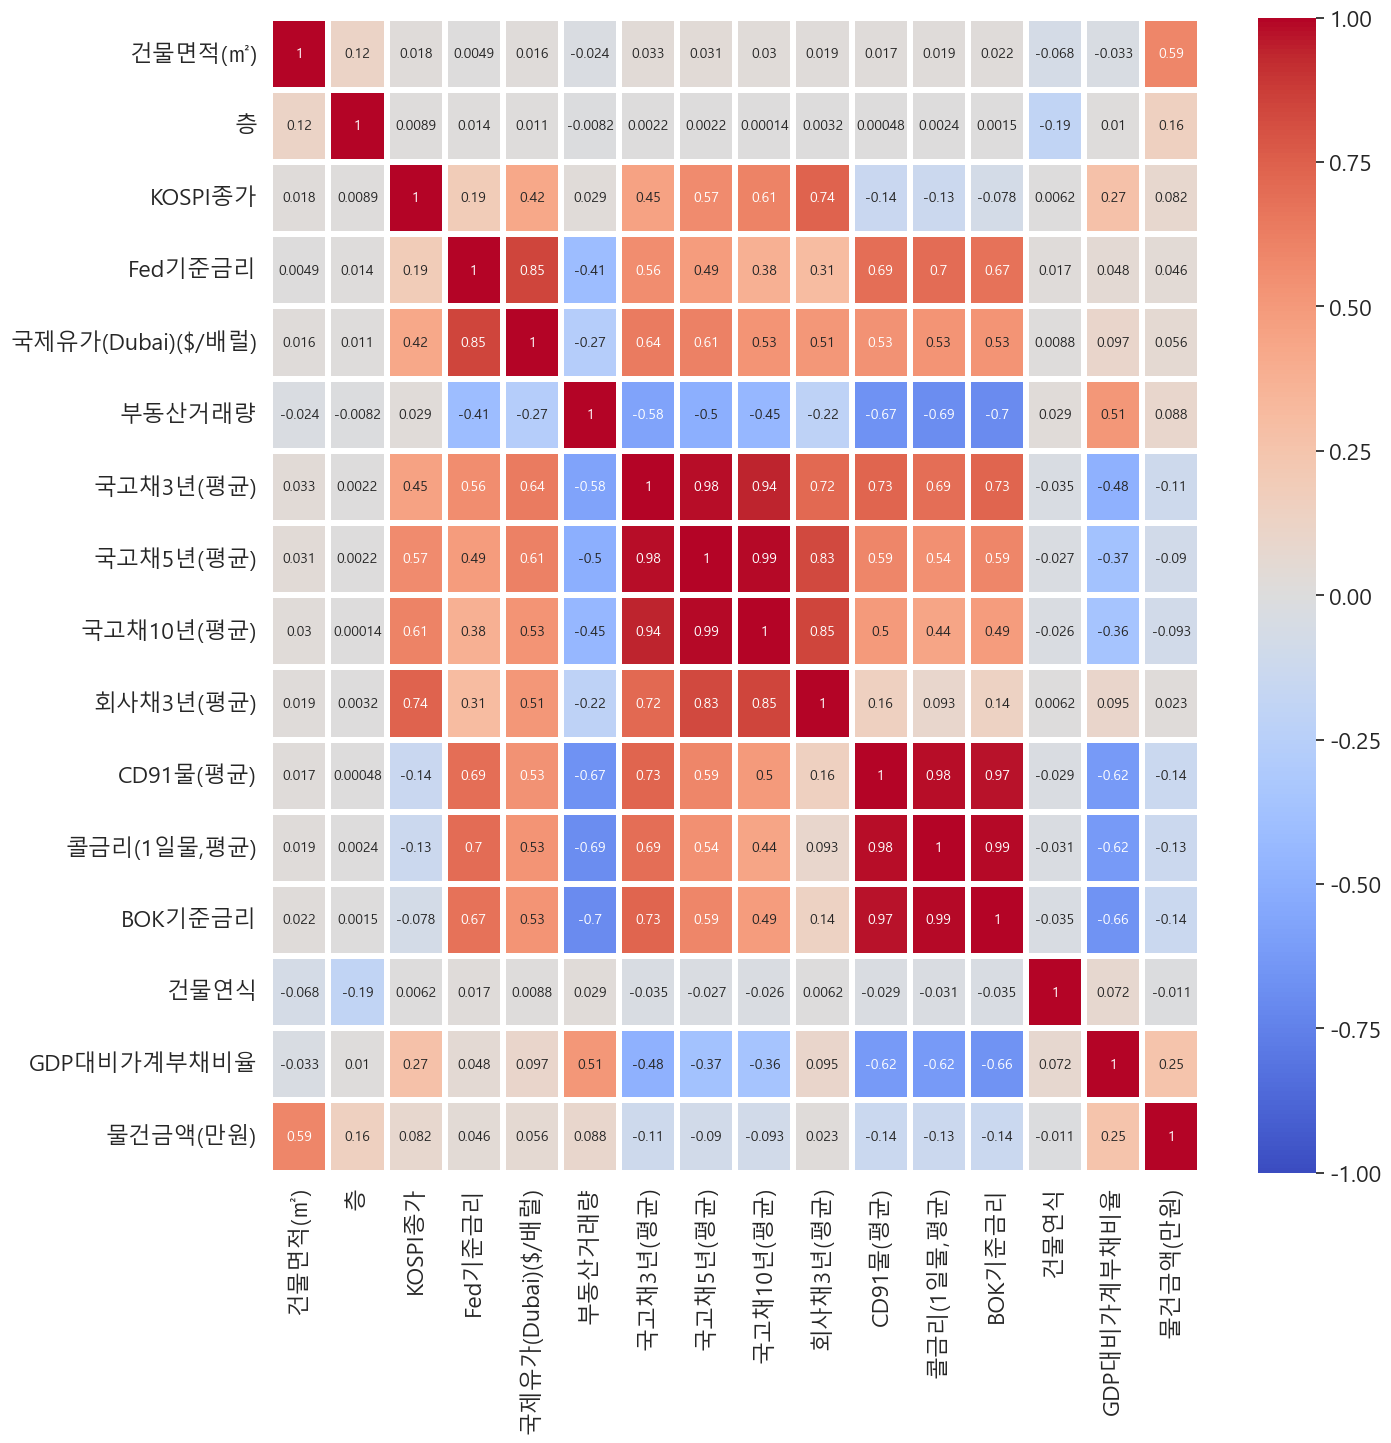

In [151]:
plot_cor(train_df_all)

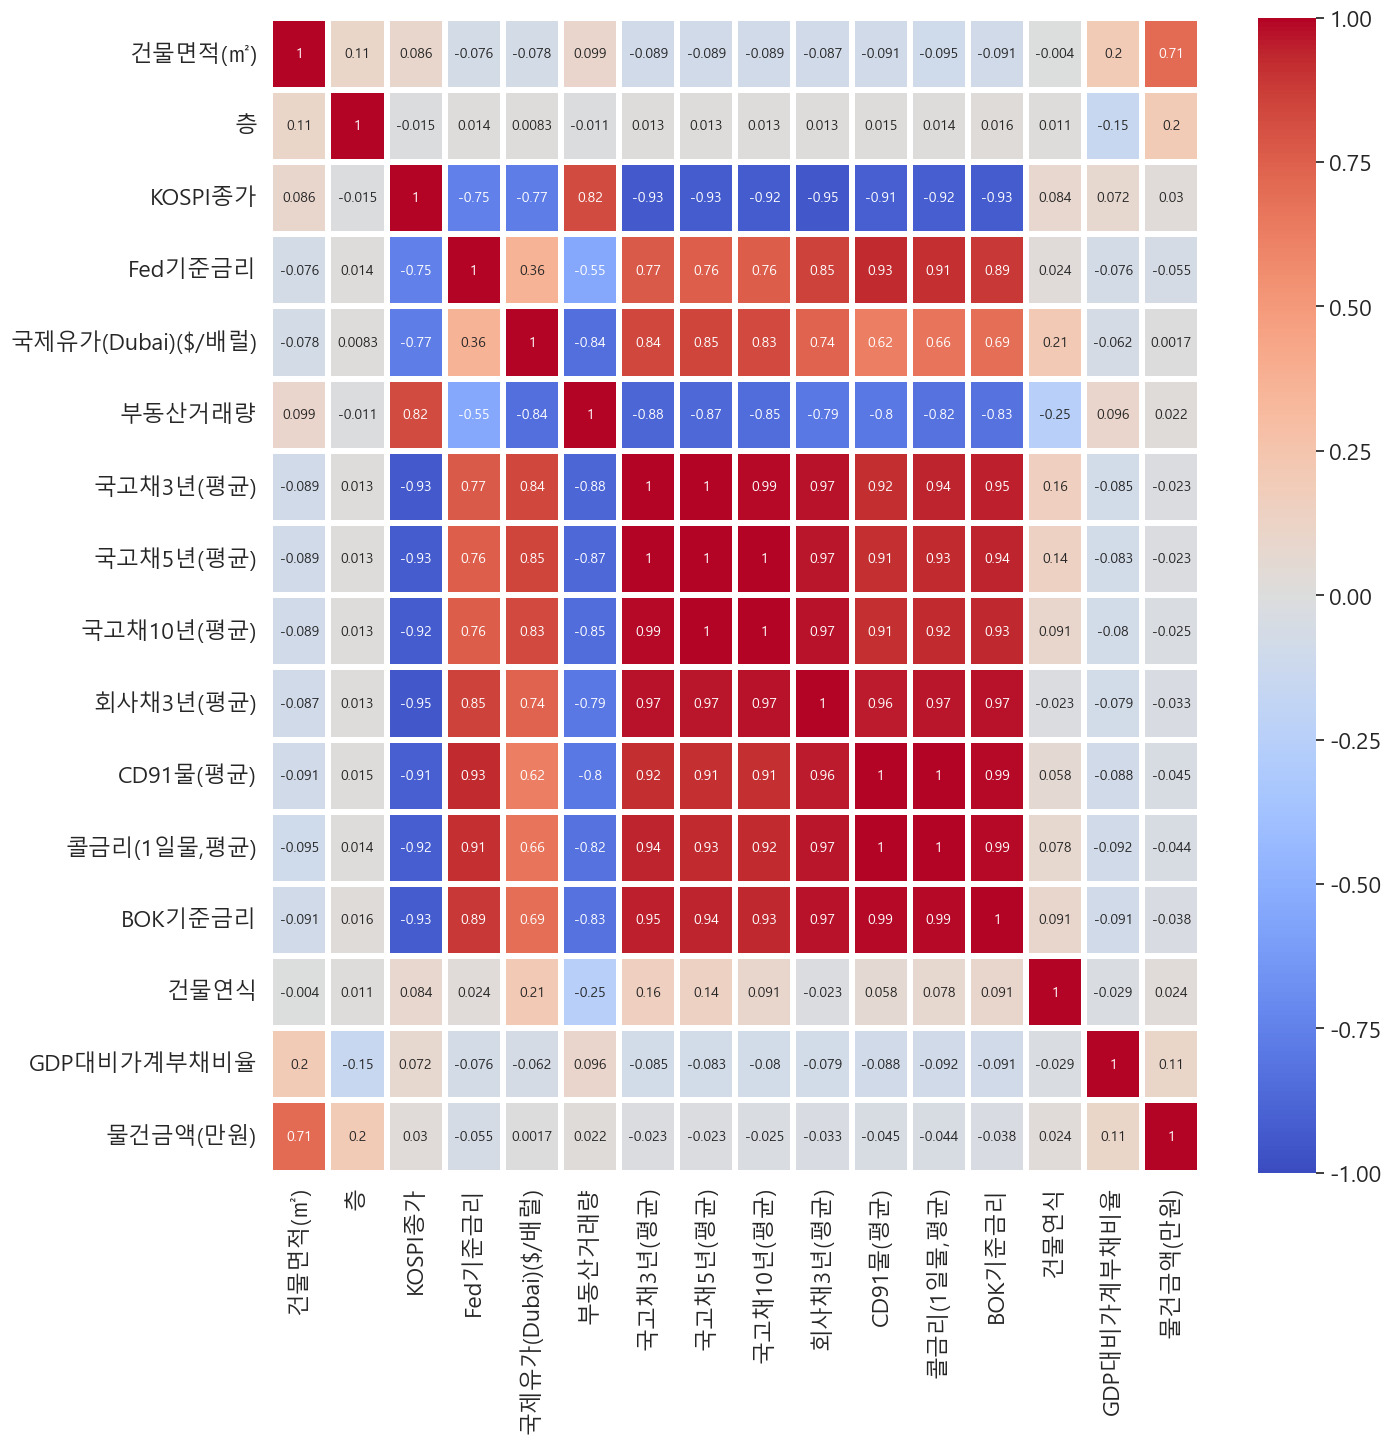

In [152]:
# Test
plot_cor(test_df)


### 전체 DF -> Train & Test

In [153]:
train_df_all.to_csv('train_df.csv', index=False)
test_df.to_csv('test_df.csv', index=False)

### 비강남 DF -> 강남 3구 + 용산구 특성 비교 위함
> train_ex_gn & test_ex_gn


In [158]:
# 비강남 DF 분리
    # Train -> 367,800 rows
train_ex_gn = train_df_all.loc[~((train_df_all['자치구']=='강남구')|(train_df_all['자치구']=='서초구')|(train_df_all['자치구']=='송파구')|(train_df_all['자치구']=='용산구'))]

    # Test -> 69,000 rows
test_ex_gn = test_df.loc[~((test_df['자치구']=='강남구')|(test_df['자치구']=='서초구')|(test_df['자치구']=='송파구')|(test_df['자치구']=='용산구'))]

# csv 
train_ex_gn.to_csv('train_ex_gn.csv', index=False)
test_ex_gn.to_csv('test_ex_gn.csv', index=False)

### 85m^2 이하 DF -> 중대형 APT 특성 비교 
> train_normal_85  & test_normal_85

In [ ]:
train_df_all.loc[train_df_all['건물면적(㎡)']<=85]

In [167]:
# 국민APT(85m^2 이하) DF 분리
    # Train ->  rows 365,652
train_normal_85 = train_df_all.loc[train_df_all['건물면적(㎡)']<=85]

    # Test -> 
test_normal_85 = test_df.loc[test_df['건물면적(㎡)']<=85]

# csv
train_normal_85.to_csv('train_normal_85.csv', index=False)
test_normal_85.to_csv('test_normal_85.csv', index=False)
